# Ocean Sciences 

## Homework #4

In [5]:
# imports
import numpy as np
from importlib import reload

from oceanpy import constants
import unyt
from oceanpy.forces import coriolis as ofc

from bokeh import plotting
from bokeh import models

from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
def set_fontsize(p, fsz):
    '''
    Parameters
    ----------
    ax : Bokeh plot class
    fsz : float
      Font size
    '''
    p.xaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.xaxis.major_label_text_font_size = "{:d}pt".format(fsz)
    #
    p.yaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.yaxis.major_label_text_font_size = "{:d}pt".format(fsz)

# 1 Coriolis Acceleration

## a) Coriolis parameter

### $f = 2 \Omega \, \sin\phi$

### Santa Cruz

In [7]:
f_SC = ofc.coriolis_parameter(37*unyt.deg)
f_SC.to('1/s')

unyt_quantity(8.77701897e-05, '1/s')

### Range of Latitudes

In [8]:
phis = np.linspace(-90., 90., 180)*unyt.deg
f = ofc.coriolis_parameter(phis)

In [9]:
# Plot
plotting.output_notebook()

p = plotting.figure(title='Coriolis Parameter', x_axis_label='Latitude [deg]',
                   y_axis_label='f [1/s]')

p.line(phis, f, legend='f(phi)', line_width=2)
p.legend.location = "bottom_left"

set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### It is a maximum at +90 deg (90N) and a minimum at -90deg (90S).

### It is zero at 0 deg.

## b) Meridional derivative

### $\beta = \partial f / \partial y = \frac{1}{R} \frac{\partial f}{\partial \phi}$

### $\beta = \frac{2 \Omega}{R}  \, \cos\phi$

In [11]:
beta = ofc.meridional_derivative(phis)
beta[0:10]

unyt_array([1.40170530e-24, 4.01744931e-10, 8.03366115e-10,
            1.20473984e-09, 1.60574249e-09, 2.00625052e-09,
            2.40614059e-09, 2.80528951e-09, 3.20357434e-09,
            3.60087240e-09], '1/(km*s)')

In [12]:
# Plot
plotting.output_notebook()

p = plotting.figure(title='Meridional derivative', x_axis_label='Latitude [deg]',
                                       y_axis_label='beta [1/km s]')


p.line(phis, beta, legend='beta(phi)', line_width=2)
p.legend.location = "top_left"

set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### $\beta$ is positive everywhere except $\phi = 90$deg where it is zero.

## c) Acceleration

### $a = d^2x/dt^2$

### Integrate once:  $v(t) = at + v_0$

### Integrate twice:  $x(t) = at^2/2 + v_0 t + x_0$

## d) Baseball

### Imperial to SI

In [17]:
v_0 = 80 * unyt.mile / unyt.hour
v_0.to('m/s')

unyt_quantity(35.7632, 'm/s')

In [22]:
d = 60 * unyt.foot
d.to('m')

unyt_quantity(18.288, 'm')

### Coriolis acceleration

### $f v$

In [23]:
# Assume Santa Cruz
f = ofc.coriolis_parameter(37*unyt.deg)

In [24]:
a_c = f * v_0
a_c.to('m/s**2')

unyt_quantity(0.00313894, 'm/s**2')

### Time to plate

In [25]:
t = d/v_0
t.to('s')

unyt_quantity(0.51136364, 's')

### Deflection

In [27]:
x = a_c * t**2 / 2
x.to('cm')

unyt_quantity(0.04104054, 'cm')

## e) Airplane

In [29]:
v_plane = 250 * unyt.m / unyt.s  # East
phi = -26*unyt.deg

### Coriolis

In [32]:
f_26S = ofc.coriolis_parameter(phi)
f_26S.to('1/s')

unyt_quantity(-6.3933131e-05, '1/s')

In [33]:
a_plane = -f_26S * v_plane
a_plane.to('m/s**2')

unyt_quantity(0.01598328, 'm/s**2')

#### Direction is to the left the  Southern Hemisphere, i.e. North

In [35]:
# Deflection
x_coriolis = a_plane * (1*unyt.hour)**2 / 2
x_coriolis.to('km')

unyt_quantity(103.57167218, 'km')

### Compare

In [36]:
x_plane_E = v_plane * (1 * unyt.hour)
x_plane_E.to('km')

unyt_quantity(900., 'km')

#### Pretty substantial, i.e. nearly 10%

# 2) Rotating Tub

In [37]:
Dx = 7 * unyt.m
Dy = 8 * unyt.m

In [38]:
m = (10.22-10.13)/8.

In [40]:
def depth(y):
    h = 10.13*unyt.m + y*m
    return h

## a) Pressure gradient

### Let the bottom of the tub be $h=0$

In [41]:
rho = 1.

### In $x$

### $\partial p/\partial x = 0$

### In $y$  (note, the height of where we do this is not relevant)
 
### $\partial p/\partial y = (\partial h/\partial y) \rho_0 g = m \rho_0 g$

## b) Gradient at bottom

### There is no difference.

## c) Unfreeze

### Initial -- Fluid accelerates from high to low with acceleration

### $F_{\rm PG} = - \frac{1}{\rho_0} \frac{\partial p}{\partial y} = m g$

### Initial horizontal is due to Coriolis

### $F_C = f v(t=0) = 0$

# 3) Geostrophic Balance

## a) Definition

### In words, geostrophic balance is the balance of the horizontal component of the Coriolis force with the horizontal component of the pressure gradient force.

### The equations:

### $-fv = \frac{-1}{\rho_0} \frac{\partial p}{\partial x}$

### $fu = \frac{-1}{\rho_0} \frac{\partial p}{\partial y}$

### where $f$ is the Coriolis parameter, $u$ and $v$ are the $x$ and $y$ components of the velocity, $\rho_0$ is the  (assumed) constant density, and $p$ is the pressure.

## b) Estimated sea heights (from the figures)

In [42]:
def plot_heights(heights, title='Sea Height', color='blue'):
    # Plot
    plotting.output_notebook()

    p = plotting.figure(title=title, x_axis_label='x',
                                           y_axis_label='Sea Height (eta)')


    p.line(np.linspace(0.,1.,heights.size), heights, line_width=2 ,color=color)
    p.legend.location = "top_left"

    set_fontsize(p, 16)

    plotting.show(p)

### i) Diagonals galore

In [43]:
d_heights = np.array([0., 1., 2., 4., 8., 12., 16., 18., 19., 20.])
d_heights.size

10

In [44]:
plot_heights(d_heights, title='i) Diagonals')

Loading BokehJS ...

/home/xavier/anaconda3/lib/python3.7/site-packages/bokeh/models/plots.py:756: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


### ii) Circles High

In [45]:
H_heights = np.array([0., 1., 3., 7., 11., 13., 11., 7., 3., 1., 0.])

In [46]:
plot_heights(H_heights, title='ii) Circles High', color='green')

Loading BokehJS ...

### iii) Circles Low

In [47]:
L_heights = 13. - np.array([0., 1., 3., 7., 11., 13., 11., 7., 3., 1., 0.])

In [48]:
plot_heights(L_heights, title='iii) Circles Low', color='red')

Loading BokehJS ...

## c) Unfrozen (non-rotating)

### i)

In [50]:
title = 'Diagonal'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ [1., 0., 1],
          [0.9, 0., 1.5],
          [0.8, 0., 2],
          [0.7, 0., 3],
          [0.6, 0., 5],
          [0.5, 0., 9],
          [0.4, 0., 15],
          [0.3, 0., 24],
          [0.2, 0., 36],
          [0.1, 0., 52],
          [0.0, 0., 76],
       ]
# Rest
for arrow in arrows[1:-1]:
    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

scale=4.
for arrow in arrows:
    arrow[2] = arrow[2]/scale

alen = 0.03
for arrow in arrows:
    asz = 5.
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=arrow[0], y_start=arrow[1], x_end=arrow[0]-alen, y_end=arrow[1]+alen, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-arrow[1], y_start=1-arrow[0], x_end=1-arrow[1]-alen, y_end=1-arrow[0]+alen, 
                              line_color='blue', line_width=arrow[2]))
    # middle
    dx = 1.-arrow[0]
    #import pdb; pdb.set_trace()
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-dx/2, y_start=dx/2, x_end=1-dx/2-alen, y_end=dx/2+alen, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-3*dx/4, y_start=dx/4, x_end=1-3*dx/4-alen, y_end=dx/4+alen, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-dx/4, y_start=3*dx/4, x_end=1-dx/4-alen, y_end=3*dx/4+alen, 
                              line_color='blue', line_width=arrow[2]))


#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### ii) Circles High

In [54]:
title = 'Circles High'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ 
    [0.02, 0.8],
    [0.1, 1.],
          [0.2, 2],
          [0.3, 4],
          [0.4, 2],
          [0.5, 1],
       ]
# Rest
#for arrow in arrows[1:-1]:
#    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

#scale=2.
#for arrow in arrows:
#   arrow[2] = arrow[2]/scale

alen = 0.05
for arrow in arrows:
    for phi in np.linspace(0., 360., 10):
        x = 0.5 + arrow[0] * np.sin(phi*unyt.deg)
        y = 0.5 + arrow[0] * np.cos(phi*unyt.deg)
        dx = alen * np.sin(phi*unyt.deg)
        dy = alen * np.cos(phi*unyt.deg)
        #
        p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=2.5*arrow[1]),
                   x_start=x, y_start=y, x_end=(x+dx), y_end=(y+dy),                               
                      line_color='blue', line_width=arrow[1]))

#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### iii) Low

In [55]:
title = 'Circles Low'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ 
    #[0.02, 0.8],
    [0.1, 1.],
          [0.2, 2],
          [0.3, 4],
          [0.4, 2],
          [0.5, 1],
       ]
# Rest
#for arrow in arrows[1:-1]:
#    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

#scale=2.
#for arrow in arrows:
#   arrow[2] = arrow[2]/scale

alen = 0.05
for arrow in arrows:
    for phi in np.linspace(0., 360., 10):
        x = 0.5 + arrow[0] * np.sin(phi*unyt.deg)
        y = 0.5 + arrow[0] * np.cos(phi*unyt.deg)
        dx = -1*alen * np.sin(phi*unyt.deg)
        dy = -1*alen * np.cos(phi*unyt.deg)
        #
        p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=2.5*arrow[1]),
                   x_start=x, y_start=y, x_end=(x+dx), y_end=(y+dy),                               
                      line_color='blue', line_width=arrow[1]))

#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### If the system is allowed to reach equilibrium with viscosity, it will become a flat surface

## d) Unfreeze + rotation

### i) Diagonal

In [56]:
title = 'Diagonal Rotating'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ [1., 0., 1],
          [0.9, 0., 1.5],
          [0.8, 0., 2],
          [0.7, 0., 3],
          [0.6, 0., 5],
          [0.5, 0., 9],
          [0.4, 0., 15],
          [0.3, 0., 24],
          [0.2, 0., 36],
          [0.1, 0., 52],
          [0.0, 0., 76],
       ]
# Rest
for arrow in arrows[1:-1]:
    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

scale=4.
for arrow in arrows:
    arrow[2] = arrow[2]/scale

alen = 0.03
ayscl = 1.2
for arrow in arrows:
    asz = 5.
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=arrow[0], y_start=arrow[1], x_end=arrow[0]-alen, y_end=arrow[1]+alen*ayscl, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-arrow[1], y_start=1-arrow[0], x_end=1-arrow[1]-alen, y_end=1-arrow[0]+alen*ayscl, 
                              line_color='blue', line_width=arrow[2]))
    # middle
    dx = 1.-arrow[0]
    #import pdb; pdb.set_trace()
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-dx/2, y_start=dx/2, x_end=1-dx/2-alen, y_end=dx/2+alen*ayscl, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-3*dx/4, y_start=dx/4, x_end=1-3*dx/4-alen, y_end=dx/4+alen*ayscl, 
                              line_color='blue', line_width=arrow[2]))
    p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=asz),
                   x_start=1-dx/4, y_start=3*dx/4, x_end=1-dx/4-alen, y_end=3*dx/4+alen*ayscl, 
                              line_color='blue', line_width=arrow[2]))


#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### ii) High

In [58]:
title = 'Circles High Rotating'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ 
    [0.02, 0.8],
    [0.1, 1.],
          [0.2, 2],
          [0.3, 4],
          [0.4, 2],
          [0.5, 1],
       ]
# Rest
#for arrow in arrows[1:-1]:
#    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

#scale=2.
#for arrow in arrows:
#   arrow[2] = arrow[2]/scale

alen = 0.05
dphi = 10*unyt.deg
for arrow in arrows:
    for phi in np.linspace(0., 360., 10):
        x = 0.5 + arrow[0] * np.sin(phi*unyt.deg)
        y = 0.5 + arrow[0] * np.cos(phi*unyt.deg)
        dx = alen * np.sin(phi*unyt.deg+dphi)
        dy = alen * np.cos(phi*unyt.deg+dphi)
        #
        p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=2.5*arrow[1]),
                   x_start=x, y_start=y, x_end=(x+dx), y_end=(y+dy),                               
                      line_color='blue', line_width=arrow[1]))

#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### iii) Low

In [59]:
title = 'Circles Low Rotating'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ 
    #[0.02, 0.8],
    [0.1, 1.],
          [0.2, 2],
          [0.3, 4],
          [0.4, 2],
          [0.5, 1],
       ]
# Rest
#for arrow in arrows[1:-1]:
#    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

#scale=2.
#for arrow in arrows:
#   arrow[2] = arrow[2]/scale

alen = 0.05
dphi = 10*unyt.deg
for arrow in arrows:
    for phi in np.linspace(0., 360., 10):
        x = 0.5 + arrow[0] * np.sin(phi*unyt.deg)
        y = 0.5 + arrow[0] * np.cos(phi*unyt.deg)
        dx = -1*alen * np.sin(phi*unyt.deg+dphi)
        dy = -1*alen * np.cos(phi*unyt.deg+dphi)
        #
        p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=2.5*arrow[1]),
                   x_start=x, y_start=y, x_end=(x+dx), y_end=(y+dy),                               
                      line_color='blue', line_width=arrow[1]))

#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### My intuition tells me the equilibrium state for a circular bathtub is the same as the coffee cup exercise that we discussed in class.  Wait, that was the Fluids class.  Anyhow, the fluid will be a bit higher near the edge of the tub and lowest at the center.

## e) Southern tub

### My favorite

In [60]:
title = 'Circles Low Rotating Southern'
# Plot
plotting.output_notebook()

p = plotting.figure(title=title, x_axis_label='x', y_axis_label='y')

p.line(np.linspace(0.,1.,10), [0.]*10, line_width=2 ,color='black')

# Arrows
arrows = [ 
    #[0.02, 0.8],
    [0.1, 1.],
          [0.2, 2],
          [0.3, 4],
          [0.4, 2],
          [0.5, 1],
       ]
# Rest
#for arrow in arrows[1:-1]:
#    arrows.append([-1*arrow[0], arrow[1], arrow[2]])

#scale=2.
#for arrow in arrows:
#   arrow[2] = arrow[2]/scale

alen = 0.05
dphi = -10*unyt.deg
for arrow in arrows:
    for phi in np.linspace(0., 360., 10):
        x = 0.5 + arrow[0] * np.sin(phi*unyt.deg)
        y = 0.5 + arrow[0] * np.cos(phi*unyt.deg)
        dx = -1*alen * np.sin(phi*unyt.deg+dphi)
        dy = -1*alen * np.cos(phi*unyt.deg+dphi)
        #
        p.add_layout(models.Arrow(end=models.NormalHead(fill_color="blue", size=2.5*arrow[1]),
                   x_start=x, y_start=y, x_end=(x+dx), y_end=(y+dy),                               
                      line_color='blue', line_width=arrow[1]))

#
p.x_range = models.Range1d(0, 1)
p.y_range = models.Range1d(0, 1)


set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

### Flow around high-pressure regions is anticyclonic.

### I think this is independent of Hemisphere (p. 31 of Talley Chapter 7 Supp)

----

# 4) Geostropic currents

## a) Arrows

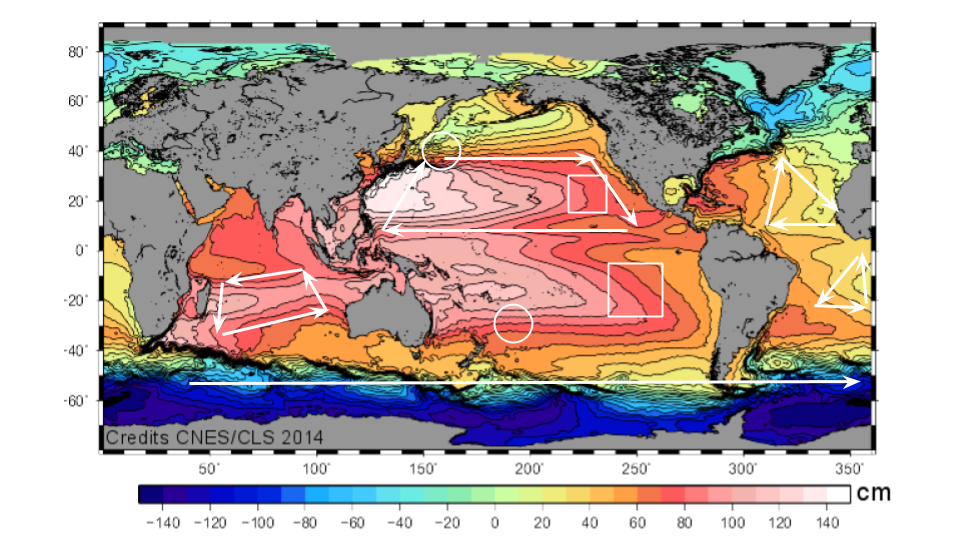

In [126]:
# Talley Fig 3.5
Image(filename = './Geostrophic_currents.png', width=1000)#, height=100)

## b) Equator

### Within about 10deg of the equator, the winds swap directions as we swap hemispheres.

### This is because $f \to 0$ at the equator.

## c) Circles and squares

### See the image above.  I put circles where the gradient in MDT is highest (largest $\partial p$) and squares where the gradient is lowest.

## d) Latitudes

### From our geostrophic equations, $v \propto f^{-1}$.  And $f \propto \sin(\phi)$.  Therefore $v$ will be higher when $\phi \approx 0$.

# Tests